In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
diabetes = load_diabetes()
data = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']], columns=diabetes['feature_names'] + ['target'])

# For simplicity, let's convert the target variable to binary: 1 if diabetes, 0 if not.
data['target'] = (data['target'] > 140).astype(int)

# Split the data into features (X) and target variable (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)


Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76        49
           1       0.71      0.72      0.72        40

    accuracy                           0.74        89
   macro avg       0.74      0.74      0.74        89
weighted avg       0.74      0.74      0.74        89



In [2]:
# Additional imports for feature scaling and cross-validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a Logistic Regression model with scaled features
logreg_model_scaled = LogisticRegression(random_state=42)
logreg_model_scaled.fit(X_train_scaled, y_train)

# Cross-validation
cv_accuracy = cross_val_score(logreg_model_scaled, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {np.mean(cv_accuracy):.2f} +/- {np.std(cv_accuracy):.2f}')


Cross-Validation Accuracy: 0.74 +/- 0.06


In [3]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Hyperparameter Tuning using Grid Search
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a logistic regression model
logreg_model_tuned = LogisticRegression(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(logreg_model_tuned, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Use the best model for predictions
logreg_model_best = grid_search.best_estimator_
y_pred_tuned = logreg_model_best.predict(X_test_scaled)


Best Parameters: {'C': 0.01}


In [5]:
# Cross-validation
cv_accuracy = cross_val_score(logreg_model_scaled, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {np.mean(cv_accuracy):.2f} +/- {np.std(cv_accuracy):.2f}')


Cross-Validation Accuracy: 0.74 +/- 0.06


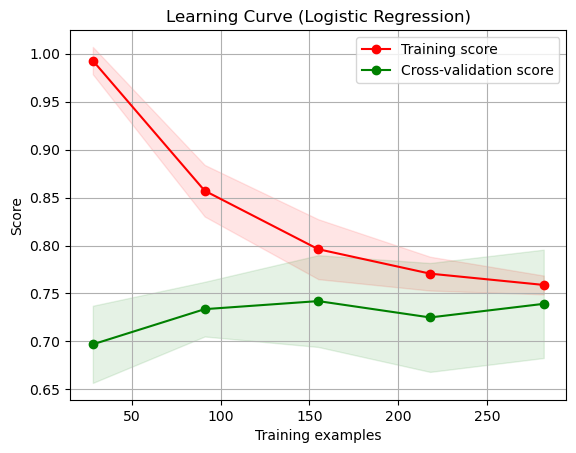

In [6]:
# Visualization (example: learning curve)
from sklearn.model_selection import learning_curve
from matplotlib import pyplot as plt

# Define a function for plotting learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
plot_learning_curve(logreg_model_scaled, "Learning Curve (Logistic Regression)", X_train_scaled, y_train, cv=5)
plt.show()


In [7]:
# Ensemble Methods (example: Random Forest)
from sklearn.ensemble import RandomForestClassifier

# Build a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Random Forest Classification Report:\n', classification_rep_rf)


Random Forest Accuracy: 0.72
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        49
           1       0.69      0.68      0.68        40

    accuracy                           0.72        89
   macro avg       0.72      0.72      0.72        89
weighted avg       0.72      0.72      0.72        89



In [9]:
# Feature Engineering (example: Polynomial features)
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Build a Logistic Regression model with polynomial features
logreg_model_poly = LogisticRegression(random_state=42)
logreg_model_poly.fit(X_train_poly, y_train)

# Make predictions on the test set with polynomial features
y_pred_poly = logreg_model_poly.predict(X_test_poly)

# Evaluate the model with polynomial features
accuracy_poly = accuracy_score(y_test, y_pred_poly)
classification_rep_poly = classification_report(y_test, y_pred_poly)

print(f'Accuracy with Polynomial Features: {accuracy_poly:.2f}')
print('Classification Report with Polynomial Features:\n', classification_rep_poly)


Accuracy with Polynomial Features: 0.74
Classification Report with Polynomial Features:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76        49
           1       0.71      0.72      0.72        40

    accuracy                           0.74        89
   macro avg       0.74      0.74      0.74        89
weighted avg       0.74      0.74      0.74        89



C:\Users\avisa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision: 0.69
Recall: 0.72
F1-score: 0.71
ROC-AUC: 0.84


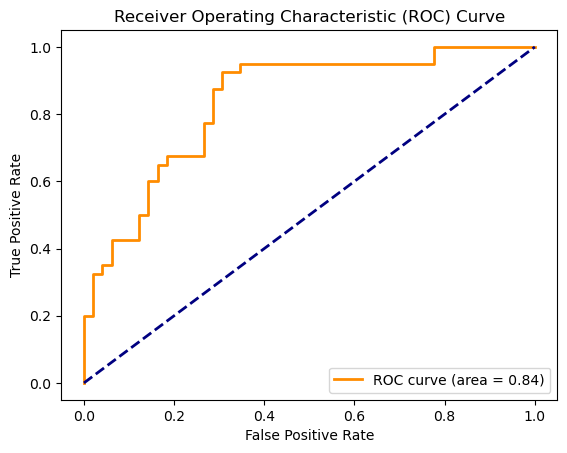

In [10]:
# Model Evaluation Metrics (example: Precision, Recall, F1-score)
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Make predictions on the test set
y_pred_proba = logreg_model_scaled.predict_proba(X_test_scaled)[:, 1]

# Set a threshold for classification
threshold = 0.5
y_pred_threshold = (y_pred_proba > threshold).astype(int)

# Evaluate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)

# Evaluate ROC-AUC and plot ROC curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


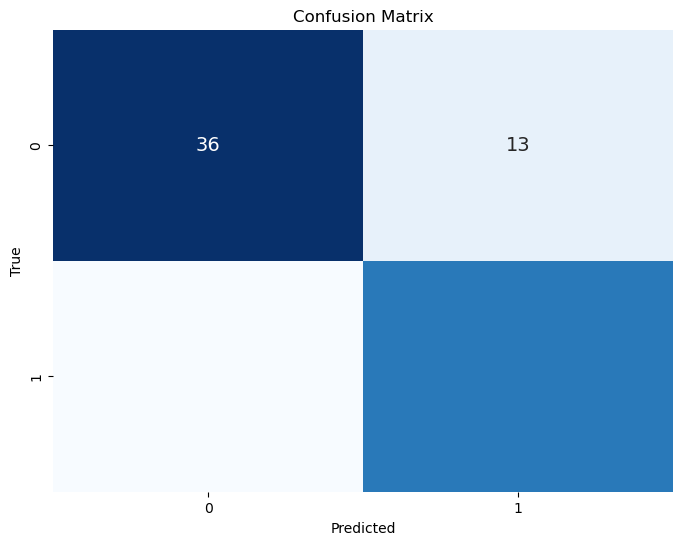

In [11]:
# 1. Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_threshold)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


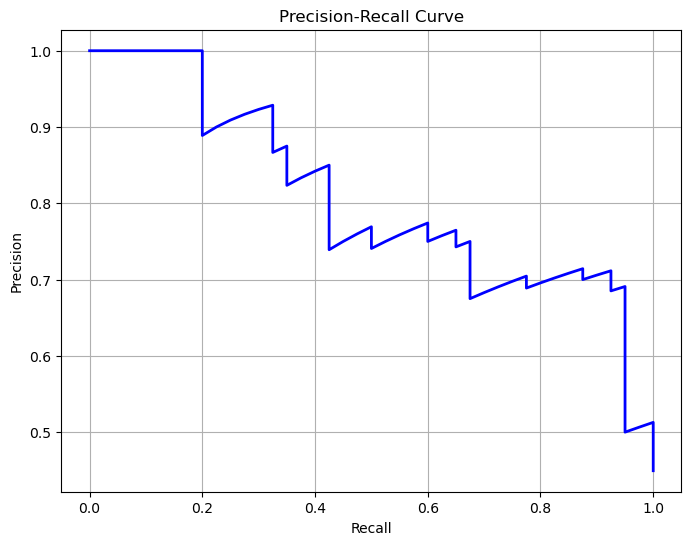

In [12]:
# 2. Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

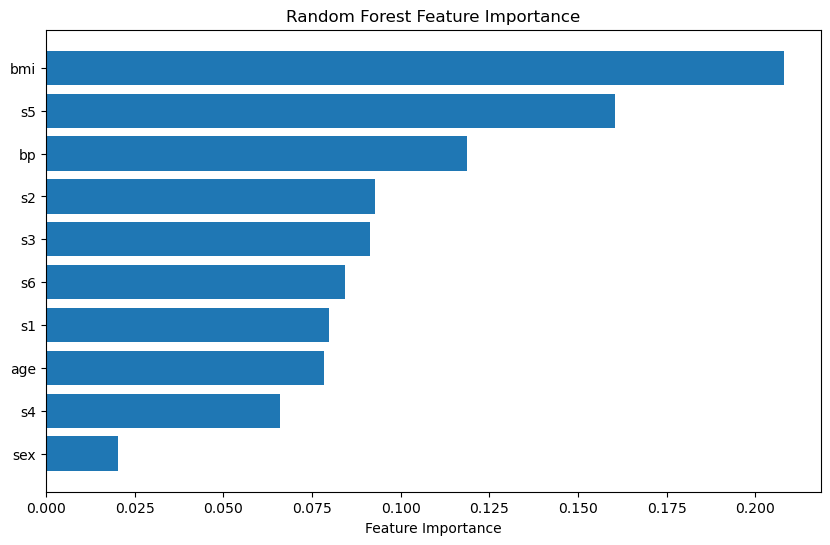

In [17]:
# 3. Feature Importance (if using a tree-based model)
if isinstance(rf_classifier, RandomForestClassifier):
    feature_importance = rf_classifier.feature_importances_
    feature_names = X.columns
    sorted_idx = np.argsort(feature_importance)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title('Random Forest Feature Importance')
    plt.show()


C:\Users\avisa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\avisa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

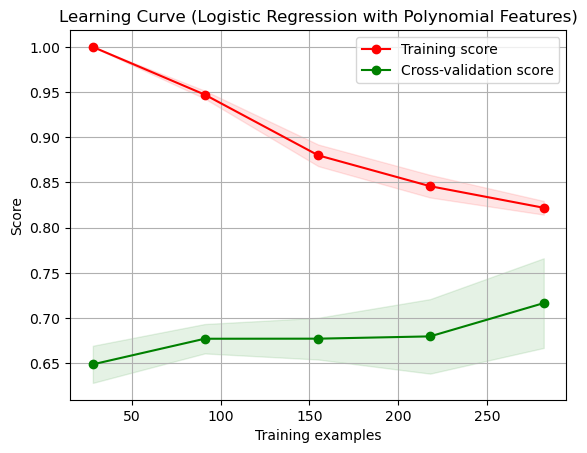

In [15]:
# 4. Learning Curve
from sklearn.model_selection import learning_curve

# Plot learning curve for the polynomial model
plot_learning_curve(logreg_model_poly, "Learning Curve (Logistic Regression with Polynomial Features)", X_train_poly, y_train, cv=5)
plt.show()

In [19]:
# Display the features (columns) in X
feature_columns = X.columns
print("Feature Columns:", feature_columns)


Feature Columns: Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
